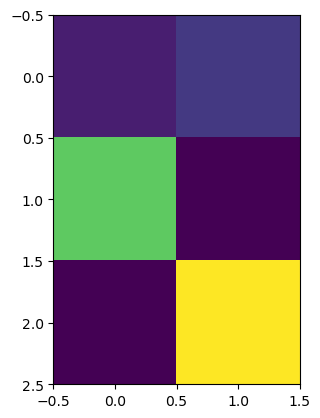

In [2]:
import numpy
a = numpy.zeros([3,2])
a[0,0] = 1
a[0,1] = 2
a[1,0] = 9
a[2,1] = 12
import matplotlib.pyplot
%matplotlib inline
matplotlib.pyplot.imshow(a, interpolation="nearest") # 同样的值显示同样的颜色

In [51]:
# 此cell定义神经网络和评估方法
import scipy.special
class neuralNetwork:
    def __init__(self,inputnodes, hiddennodes,outputnodes,learningrate):
        self.inodes = inputnodes
        self.hnodes = hiddennodes
        self.onodes = outputnodes
        self.lr = learningrate
        # 输出层到隐藏层的权重矩阵
        # self.wih = (numpy.random.rand(self.hnodes,self.inodes) - 0.5)
        # 隐藏层到输出层的权重矩阵
        # self.who = (numpy.random.rand(self.onodes,self.hnodes) - 0.5)
        self.wih = numpy.random.normal(0.0, pow(self.inodes, -0.5), (self.hnodes, self.inodes))
        self.who = numpy.random.normal(0.0, pow(self.hnodes, -0.5), (self.onodes, self.hnodes))
        self.active_function = lambda x: scipy.special.expit(x)

    # train做两件事，第一件事是计算，跟query中的无异，第二部分是反向传递误差，更新权重
    def train(self, inputs_list, targets_list):
        inputs = numpy.array(inputs_list, ndmin = 2).T
        # 目标输出列表
        targets = numpy.array(targets_list, ndmin = 2).T

        hidden_inputs = numpy.dot(self.wih, inputs)
        hidden_outputs = self.active_function(hidden_inputs)

        final_inputs = numpy.dot(self.who, hidden_outputs)

        final_outputs = self.active_function(final_inputs)

        output_errors = targets - final_outputs # 结果误差
        hidden_errors = numpy.dot(self.who.T, output_errors) # 输入层各个误差
        # 误差纠正（结点权重调整）
        self.who += self.lr * numpy.dot((output_errors * final_outputs * (1.0 - final_outputs)), numpy.transpose(hidden_outputs))
        self.wih += self.lr * numpy.dot((hidden_errors * hidden_outputs * (1.0 - hidden_outputs)), numpy.transpose(inputs))



    # input_list 为一个输如列表
    def query(self, inputs_list):
        # 转置输入矩阵
        inputs = numpy.array(inputs_list, ndmin = 2).T
        # 权重矩阵 . 输入矩阵等于隐藏层的输入
        hidden_inputs = numpy.dot(self.wih, inputs)
        # 输出层的输出是激活函数 作用于隐藏层的输入上
        hidden_outputs = self.active_function(hidden_inputs)

        final_inputs = numpy.dot(self.who, hidden_outputs)

        final_outputs = self.active_function(final_inputs)
        return final_outputs # 将最终的谁出层的输出返回

# 评估函数 ,传入评估函数
def evaluate(test_data_list, network):
    scorecard = []
    for record in test_data_list:
        all_values = record.split(",") # 分割得到列表
        target_result = int(all_values[0]) # 正确答案是第一个 ，这里需要转换为int，否则在下面的 == 处不成立
        pred_list = network.query((numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01)
        # print(f"列表{pred_list}")
        pred_result = numpy.argmax(pred_list) # 取得结果最大的下标
        if (pred_result == target_result):
            scorecard.append(1)
        else:
            scorecard.append(0)
    score_array = numpy.asarray(scorecard)
    # print(score_array)
    return score_array.sum() / score_array.size





In [53]:
# 显示每一行对应的数字图像
# all_values = data_list[2].split(",")
# 图像array：做成numpy数组，这个数组从第二个数字开始截断，重塑成28 * 28的二维数组
# image_array = numpy.asfarray(all_values[1:]).reshape((28,28))
# matplotlib.pyplot.imshow(image_array, cmap="Greys", interpolation="None") # 同样的值显示同样的颜色

# 创建一个神经网络以测试代码的正确性
input_nodes = 784
hidden_nodes = 100
output_nodes = 10
learning_rate = 0.3
# 创建一个神经网络
n = neuralNetwork(input_nodes,hidden_nodes,output_nodes,learning_rate)
# 读取训练文件
data_file = open("dataset/mnist_train_60000.csv","r")
train_data_list = data_file.readlines()
data_file.close()

# 训练网络
epoch = 1 # 训练五代
for i in range(epoch):
    for record in train_data_list:
        all_values = record.split(",") # 用，分割参数
        # 输入节点有28 * 28
        inputs = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
        # 目标输出，目标输出只有十个结点
        targets = numpy.zeros(output_nodes) + 0.01 # 初始化全部为0.01
        targets[int(all_values[0])] = 0.99 # 正确答案为0.99
        n.train(inputs,targets)

# 预测结果
data_file = open("dataset/mnist_test_10000.csv","r")
test_data_list = data_file.readlines()
data_file.close()
# all_values = test_data_list[6].split(",")
# image_array = numpy.asfarray(all_values[1:]).reshape((28,28))
# matplotlib.pyplot.imshow(image_array, cmap="Greys", interpolation="None") # 同样的值显示同样的颜色
# pred_list = n.query((numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01)
# print(f'预测数字：{numpy.argmax(pred_list)}')

evaluate(test_data_list, n)



[1 1 1 ... 1 1 1]


0.942